# step_1_lesson_7.csv
First, let's look at the distribution of site visits by day. Build a graph with the distribution of the number of visits from bots and regular users of Yandex.Metrika. The data for plotting the graph is stored here.

In [1]:
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('C:/Users/stask/Analitics_Karpov/Module7/Project/step_1_lesson_7.csv')

<AxesSubplot:xlabel='date', ylabel='visits'>

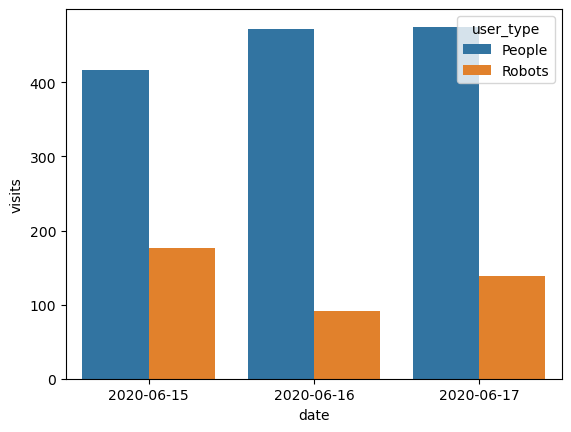

In [3]:
sns.barplot(data=df,
            x='date',
            y='visits',
            hue='user_type')

# step_2_lesson_7.csv
Determine the percentage of visits to the Yandex.Metrics site from the Google Chrome browser. The data is stored here.
Round the answer to whole numbers.

In [4]:
yandex_df = pd.read_csv('C:/Users/stask/Analitics_Karpov/Module7/Project/step_2_lesson_7.csv')
yandex_df.head()

,date,browser,visits
0,2020-06-15,Google Chrome,354.0
1,2020-06-15,Firefox,58.0
2,2020-06-15,Yandex Browser,54.0
3,2020-06-15,Safari,41.0
4,2020-06-15,Chrome Mobile,31.0


In [5]:
round(yandex_df.query('browser == "Google Chrome"').visits.sum() / yandex_df.visits.sum() * 100)

60

# step_3_lesson_7.csv
Let's find out which browser gets the most bots. Look at the data and determine which browser has the LARGEST proportion of bot visits to the site as a percentage of total visits?
Include the name of the browser as your answer.

In [6]:
visits_df = pd.read_csv('C:/Users/stask/Analitics_Karpov/Module7/Project/step_3_lesson_7.csv')
visits_df.head()

,date,browser,user_type,visits
0,2020-06-15,Google Chrome,People,250.0
1,2020-06-15,Google Chrome,Robots,104.0
2,2020-06-15,Yandex Browser,People,47.0
3,2020-06-15,Firefox,Robots,31.0
4,2020-06-15,Chrome Mobile,People,31.0


In [7]:
user_type_by_browser = visits_df.query('user_type == "Robots"').groupby(['browser','user_type']).agg({'visits':'sum'})

In [8]:
browser_total = visits_df.groupby(['browser']).agg({'visits':'sum'})

In [9]:
merged_df = user_type_by_browser.merge(browser_total, on='browser', suffixes=['_robot', '_total'])
merged_df

,visits_robot,visits_total
browser,,
Chromium,1.0,2.0
Edge,1.0,5.0
Firefox,31.0,58.0
Google Chrome,104.0,354.0
Mobile Safari,1.0,16.0
Opera,5.0,16.0
Safari,22.0,41.0
Samsung Internet,1.0,9.0
UCWEB,4.0,4.0


In [10]:
(merged_df.visits_robot / merged_df.visits_total)

browser
Chromium            0.500000
Edge                0.200000
Firefox             0.534483
Google Chrome       0.293785
Mobile Safari       0.062500
Opera               0.312500
Safari              0.536585
Samsung Internet    0.111111
UCWEB               1.000000
Yandex Browser      0.129630
dtype: float64

# step_4_lesson_7.csv
Aggregate the data by day, user type, browser, and create a column with a metric for the percentage of visits to the site for each of these sections.
In your answer, enter the percentage of times the site was opened by real Safari users (not bots) to 1 decimal place.
Hint: note, here you need to find the proportion of visits by specific types of users from a specific browser to all-all visits to the site for that day.


In [11]:
visits_df['percent'] = visits_df.visits / visits_df.visits.sum() * 100
visits_df.query('user_type == "People" and browser == "Safari"')

,date,browser,user_type,visits,percent
7,2020-06-15,Safari,People,19.0,3.198653


# 💀 Tough assignment! 💀
Using the gspread library, send the data from the previous step to Google SpreadSheet. Then send a link to the resulting file in Google SpreadSheet (don't forget to open access to the link, you can do it manually when the data is already poured into the table) using vk api to yourself in VKontakte. 

In [12]:
import gspread
from df2gspread import df2gspread as d2g
from oauth2client.service_account import ServiceAccountCredentials
import credentials

In [13]:
# Set up credentials
scope = ['https://spreadsheets.google.com/feeds', 'https://www.googleapis.com/auth/drive']
my_mail = 'staskv2000@gmail.com'
# Don't forget to add a file with key in current folder
credents = ServiceAccountCredentials.from_json_keyfile_name(credentials.google_token, scope)
gs = gspread.authorize(credents)
gs

In [14]:
# creating and opening a new table and giving an access
table_name = 'some_test'
gs.create(table_name)
table = gs.open(table_name)

table.share(my_mail, perm_type='user', role='writer')

<Response [200]>

In [15]:
# let's upload this df to a new sheet
sheet = 'New'
d2g.upload(visits_df, 
           table_name, 
           sheet, 
           credentials=credents, 
           row_names=True)

<Worksheet 'New' id:1266254212>

In [16]:
# Let's send a link to this file to our vk chat and than send an attachment 
import vk_api
import numpy as np
import requests
import json

In [17]:
vk_session = vk_api.VkApi(token=credentials.vk_token)
vk = vk_session.get_api()

In [18]:
link_doc = 'https://docs.google.com/spreadsheets/d/1CgPJjLS6HC84n8S6VW8Uv_fI83RFI9RmlsunwDclYiM/edit#gid=511000791'

In [19]:
vk.messages.send(chat_id=1,
               random_id=np.random.randint(0, 2**31),
               message=f'Hello, here is the link to report you asked: \n{link_doc}')

0

In [20]:
# Specify path to the file and its future name in the message
my_id = 812200163

path_to_file = 'C:/Users/stask/Analitics_Karpov/Module3/Homework.pdf'
file_name = 'homework_module3.pdf'

upload_url = vk.docs.getMessagesUploadServer(peer_id=my_id)["upload_url"]
upload_url

'https://pu.vk.com/c909628/upload.php?act=add_doc_new&mid=-221510692&aid=-1&gid=0&type=0&peer_id=812200163&rhash=711af809e3150f7fb14a16d0bd29b3a8&api=1&server=909628&_origin=https%3A%2F%2Fapi.vk.com&_sig=40d0becb7ee8957aa8ef00d1876dda1c'

In [21]:
with open(path_to_file,'rb') as f:
    file = {'file':(file_name,f)}
    response = requests.post(upload_url,files=file)

In [22]:
json_data = json.loads(response.text)
saved_file = vk.docs.save(file=json_data['file'], title=file_name)
attachment = 'doc{}_{}'.format(saved_file['doc']['owner_id'], saved_file['doc']['id'])

In [23]:
saved_file

{'type': 'doc',
 'doc': {'id': 667360376,
  'owner_id': 812200163,
  'title': 'homework_module3.pdf',
  'size': 302330,
  'ext': 'pdf',
  'date': 1689489962,
  'type': 1,
  'url': 'https://vk.com/doc812200163_667360376?hash=4cLyQMsZzacTDJtPPjCB2XSx3UkVz0QeZN1kYkniFXw&dl=jPmUVAHOXxrJBcoSyRTc46WHHaTu3cHMX0zRV0XWfvg&api=1&no_preview=1',
  'is_unsafe': 0}}

In [24]:
vk.messages.send(
    chat_id=1,  # id of chat where to send
    random_id=np.random.randint(1, 2 ** 31),  # random number for message identification
    message='Got a parcel for your boy!',  # message text, optional here
    attachment=attachment)  # attachment name 

0

⭐️ Assignment with an asterisk! ⭐️
Another analyst has already aggregated some of the data from the metric, and you need to combine efforts to get the final report. Read the additional data from Google SpreadSheet, merge your table from the previous step with the analyst's table and calculate the number of visits per person (visits to users ratio) broken down by browser and Robots/People values.
In your answer, indicate how many visits per unique user are made by bots from the Google Chrome browser (round up to integers)
This is how you can read another analyst's data:

from io import BytesIO
import requests
r = requests.get('https://docs.google.com/spreadsheets/d/e/2PACX-1vQWMsvBTVio9C7IOOxfFO9C15BRHyME-_ENHqBodDOjuiHwk9fCuF5hUVmDs497PZOqPYK3exdSikOK/pub?gid=1006633900&single=true&output=csv')
data = r.content

df = pd.read_csv(BytesIO(data))

In [29]:
df1 = pd.read_csv('C:/Users/stask/Analitics_Karpov/Module7/Project/step_4_lesson_7.csv')
df1.head()

,date,browser,user_type,visits
0,2020-06-15,Google Chrome,People,250.0
1,2020-06-15,Google Chrome,Robots,104.0
2,2020-06-15,Yandex Browser,People,47.0
3,2020-06-15,Firefox,Robots,31.0
4,2020-06-15,Chrome Mobile,People,31.0


In [30]:
from io import BytesIO 
import requests 
r = requests.get('https://docs.google.com/spreadsheets/d/e/2PACX-1vQWMsvBTVio9C7IOOxfFO9C15BRHyME-_ENHqBodDOjuiHwk9fCuF5hUVmDs497PZOqPYK3exdSikOK/pub?gid=1006633900&single=true&output=csv') 
data = r.content

df2 = pd.read_csv(BytesIO(data))
df2.head()

,date,browser,user_type,users
0,2020-06-15,Google Chrome,People,240.0
1,2020-06-15,Google Chrome,Robots,104.0
2,2020-06-15,Yandex Browser,People,44.0
3,2020-06-15,Chrome Mobile,People,30.0
4,2020-06-15,Firefox,Robots,29.0


In [32]:
full_data = df1.merge(df2, on=['date', 'browser', 'user_type'])

In [35]:
full_data['ratio'] = full_data.visits / full_data.users
full_data.head()

,date,browser,user_type,visits,users,ratio
0,2020-06-15,Google Chrome,People,250.0,240.0,1.041667
1,2020-06-15,Google Chrome,Robots,104.0,104.0,1.000000
2,2020-06-15,Yandex Browser,People,47.0,44.0,1.068182
3,2020-06-15,Firefox,Robots,31.0,29.0,1.068966
4,2020-06-15,Chrome Mobile,People,31.0,30.0,1.033333


In [34]:
full_data.query('browser == "Google Chrome" and user_type == "Robots"')

,date,browser,user_type,visits,users,ratio
1,2020-06-15,Google Chrome,Robots,104.0,104.0,1.0
